<div class="markdown-google-sans">

# **Using spaCy**
</div>



### **Installation**

SpaCy (together with its data and models) can be installed using the python package index and setup tools.

Use the following command to install spacy using pip install on your machine:


In [1]:
!pip install spacy

### **Statistical Model**

spaCy offers statistical models for a variety of languages, which can be installed as individual modules in Python. These models are powerful engines of spaCy that performs several NLP-related tasks, such as part-of-speech tagging, named entity recognition, and dependency parsing.

You can download these models for the English language by executing the following code:


In [2]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 110.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Once downloaded, those models can be opened via **spacy.load('model_name')** in python. Therefore, you can verify if the models were downloaded successfully by running the following code:

In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')

### **Read Text File**

You can also convert a .txt file into a processed object. Notice that the .txt file needs to be in the current working directory, or you will have to specify its full path. A quick reminder that you can get the current working directory with os.getcwd() and change it with os.chdir() after importing os.


In [4]:
# Define the file path to save the text
lotr_script = '/content/The Fellowship Of The Ring_Ch1.txt'

# Writing the multiline string to the text file
with open(lotr_script, 'r', encoding='utf-8') as f:
    text = f.read()

In [5]:
# Increase the max_length to handle the large text, avoids an error
nlp.max_length = len(text) # Sets the maximum length to the length of the text

doc = nlp(text)

You may assume that variable name ending with the suffix _doc are spaCy’s language model objects.

## **Named Entity Recognition (NER)**

A named entity is an object’s assigned name, for example, a person’s name, a film, a book title, or a song’s name. spaCy can recognize these named entities in a document by asking the model for a prediction. Because the performance of the models depends on the examples they were trained on, NEF might not always work perfectly and you might need to adjust the tuning based on your case.

Named entity recognition can be accomplished when you apply the ents property to an output:


In [6]:
import pandas as pd

# Create an empty DataFrame
ent_df = pd.DataFrame()

# Create a list to collect entity data before adding it to the dataframe
entities_data = []

# For each identified named entity, store its text, start, end, and label
for ent in doc.ents:
    entities_data.append({
        'text': ent.text,
        'label': ent.label_
    })

# Convert the list of entities into a DataFrame
ent_df = pd.DataFrame(entities_data)

# Display the dataframe
ent_df

,text,label
0,Chapter 1,LAW
1,Party,ORG
2,Bilbo Baggins,PERSON
3,Bag End,ORG
4,first,ORDINAL
...,...,...
520,Shire,PERSON
521,Gandalf,NORP
522,Frodo,ORG
523,Frodo,ORG


### Text and Label Counts

In [7]:
ent_df['text'].value_counts()[:15]

,count
text,
Bilbo,86
Frodo,47
Gandalf,36
Bag End,18
Hobbiton,12
Shire,12
Gaffer,10
Bywater,9
Baggins,9


In [8]:
ent_df['label'].value_counts()[:15]

,count
label,
PERSON,159
ORG,131
GPE,56
CARDINAL,54
DATE,42
NORP,29
TIME,14
ORDINAL,12
LOC,8


In [9]:
spacy.explain("FAC")

'Buildings, airports, highways, bridges, etc.'

In [10]:
ent_df[['text', 'label']].value_counts()[:20]

text           label   
Bilbo          PERSON      39
               GPE         35
Frodo          ORG         33
Gandalf        NORP        25
Frodo          PERSON      14
Bag End        ORG         14
Hobbiton       ORG         11
Bilbo          ORG         10
Gaffer         PERSON      10
Bywater        PERSON       8
Baggins        PERSON       7
one            CARDINAL     7
two            CARDINAL     7
Shire          PERSON       7
Lobelia        GPE          7
Gandalf        ORG          6
Tooks          ORG          6
three          CARDINAL     6
first          ORDINAL      6
Bilbo Baggins  PERSON       5
Name: count, dtype: int64

In [11]:
ent_df["label"].unique()

array(['LAW', 'ORG', 'PERSON', 'ORDINAL', 'GPE', 'LOC', 'DATE',
       'CARDINAL', 'FAC', 'PRODUCT', 'TIME', 'NORP', 'WORK_OF_ART',
       'EVENT'], dtype=object)

## Diving into the NLP Container
[NLP Pipeline Documentation](https://spacy.io/usage/processing-pipelines#processing)

In [12]:
dir(nlp)

['Defaults',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_components',
 '_config',
 '_disabled',
 '_ensure_doc',
 '_ensure_doc_with_context',
 '_factory_meta',
 '_get_pipe_index',
 '_has_gpu_model',
 '_link_components',
 '_meta',
 '_multiprocessing_pipe',
 '_optimizer',
 '_path',
 '_pipe_configs',
 '_pipe_meta',
 '_resolve_component_status',
 'add_pipe',
 'analyze_pipes',
 'batch_size',
 'begin_training',
 'component',
 'component_names',
 'components',
 'config',
 'create_optimizer',
 'create_pipe',
 'create_pipe_from_source',
 'default_config',
 'default_error_handler',
 'disable_pipe',
 'disable_pipes',
 'disabl

### DisplaCy for Entity Recognition

In [13]:
from spacy import displacy

displacy.render(doc, style = "ent", jupyter = True)

In [14]:
nlp.pipe_labels

{'tok2vec': [],
 'tagger': ['$',
  "''",
  ',',
  '-LRB-',
  '-RRB-',
  '.',
  ':',
  'ADD',
  'AFX',
  'CC',
  'CD',
  'DT',
  'EX',
  'FW',
  'HYPH',
  'IN',
  'JJ',
  'JJR',
  'JJS',
  'LS',
  'MD',
  'NFP',
  'NN',
  'NNP',
  'NNPS',
  'NNS',
  'PDT',
  'POS',
  'PRP',
  'PRP$',
  'RB',
  'RBR',
  'RBS',
  'RP',
  'SYM',
  'TO',
  'UH',
  'VB',
  'VBD',
  'VBG',
  'VBN',
  'VBP',
  'VBZ',
  'WDT',
  'WP',
  'WP$',
  'WRB',
  'XX',
  '_SP',
  '``'],
 'parser': ['ROOT',
  'acl',
  'acomp',
  'advcl',
  'advmod',
  'agent',
  'amod',
  'appos',
  'attr',
  'aux',
  'auxpass',
  'case',
  'cc',
  'ccomp',
  'compound',
  'conj',
  'csubj',
  'csubjpass',
  'dative',
  'dep',
  'det',
  'dobj',
  'expl',
  'intj',
  'mark',
  'meta',
  'neg',
  'nmod',
  'npadvmod',
  'nsubj',
  'nsubjpass',
  'nummod',
  'oprd',
  'parataxis',
  'pcomp',
  'pobj',
  'poss',
  'preconj',
  'predet',
  'prep',
  'prt',
  'punct',
  'quantmod',
  'relcl',
  'xcomp'],
 'attribute_ruler': [],
 'lemmatizer':

## What Things are Missing or Incorrect in the Entity Recognizer?

1. Locations (GPE and LOC)


2. Person Names (PERSON)


3. Organizations (ORG)


In [15]:
{"PERSON" : "Frodo"}

{'PERSON': 'Frodo'}

## Creating Custom Entity Recognizers

[EntityRuler Documentation](https://spacy.io/api/entityruler#add_patterns)

In [25]:
# Custom entity patterns
entity_patterns = [
    {"label": "PERSON", "pattern": "Gollum"},
    {"label": "PERSON", "pattern": "Gorbadoc"},
    {"label": "PERSON", "pattern": "Daddy Twofoot"},
    {"label": "PERSON", "pattern": "Old Noakes"},
    {"label": "FAMILY", "pattern": "Bucklanders"},
    {"label": "HOBBIT", "pattern": "Bilbo Baggins"},
    {"label": "LOC", "pattern": "Brandywine River"},
    {"label": "LOC", "pattern": "The Hill"},
    {"label": "LOC", "pattern": "The Water"},
    {"label": "FAMILY", "pattern": "Brandybucks"},
    {"label": "FAMILY", "pattern": "Tooks"},
    {"label": "WIZARD", "pattern": "Gandalf"},
    {"label": "HOBBIT", "pattern": "Frodo"},
    {"label": "GPE", "pattern": "Shire"},
    {"label": "FAMILY", "pattern":"Bagginses"},
    {"label": "PERSON", "pattern": "Mr. Baggins"},
    {"label": "FAMILY", "pattern": "Baggins"},
    {"label": "MAGIC_OBJECT", "pattern": [{"LOWER": "ring"}]}, # checks for lower and upper case
    {"label": "MAGIC_OBJECT", "pattern": [{"LOWER": "my"}, {"LOWER": "precious"}]},
    {"label": "GPE", "pattern" : "Bag End"},
    {"label": "HOBBIT", "pattern" : "Bilbo"}
]

# Check if EntityRuler already exists in the pipeline
if "entity_ruler" in nlp.pipe_names:
    # Get the existing EntityRuler and add patterns
    ruler = nlp.get_pipe("entity_ruler")
    ruler.add_patterns(entity_patterns)
else:
    # Create EntityRuler and add it to the pipeline
    ruler = nlp.add_pipe("entity_ruler", before="ner")
    ruler.add_patterns(entity_patterns)

In [26]:
nlp.pipe_labels

{'tok2vec': [],
 'tagger': ['$',
  "''",
  ',',
  '-LRB-',
  '-RRB-',
  '.',
  ':',
  'ADD',
  'AFX',
  'CC',
  'CD',
  'DT',
  'EX',
  'FW',
  'HYPH',
  'IN',
  'JJ',
  'JJR',
  'JJS',
  'LS',
  'MD',
  'NFP',
  'NN',
  'NNP',
  'NNPS',
  'NNS',
  'PDT',
  'POS',
  'PRP',
  'PRP$',
  'RB',
  'RBR',
  'RBS',
  'RP',
  'SYM',
  'TO',
  'UH',
  'VB',
  'VBD',
  'VBG',
  'VBN',
  'VBP',
  'VBZ',
  'WDT',
  'WP',
  'WP$',
  'WRB',
  'XX',
  '_SP',
  '``'],
 'parser': ['ROOT',
  'acl',
  'acomp',
  'advcl',
  'advmod',
  'agent',
  'amod',
  'appos',
  'attr',
  'aux',
  'auxpass',
  'case',
  'cc',
  'ccomp',
  'compound',
  'conj',
  'csubj',
  'csubjpass',
  'dative',
  'dep',
  'det',
  'dobj',
  'expl',
  'intj',
  'mark',
  'meta',
  'neg',
  'nmod',
  'npadvmod',
  'nsubj',
  'nsubjpass',
  'nummod',
  'oprd',
  'parataxis',
  'pcomp',
  'pobj',
  'poss',
  'preconj',
  'predet',
  'prep',
  'prt',
  'punct',
  'quantmod',
  'relcl',
  'xcomp'],
 'attribute_ruler': [],
 'lemmatizer':

#### Testing the new Entity Ruler in the Pipeline

In [27]:
from spacy import displacy

doc_2 = nlp("Gandalf went to Bilbo's house for his birthday because he was my precious which is the Ring.")
displacy.render(doc_2, style="ent", jupyter=True)

## Re-Run the Text through the Updated NLP Container

In [28]:
# Increase the max_length to handle the large text, avoids an error
nlp.max_length = len(text) # Sets the maximum length to the length of the text

doc = nlp(text)

In [29]:
from spacy import displacy

displacy.render(doc, style = "ent", jupyter = True)

### Text and Label Counts (Second Attempt)

In [30]:
import pandas as pd

# Create an empty DataFrame
ent_df = pd.DataFrame()

# Create a list to collect entity data before adding it to the dataframe
entities_data = []

# For each identified named entity, store its text, start, end, and label
for ent in doc.ents:
    entities_data.append({
        'text': ent.text,
        'label': ent.label_
    })

# Convert the list of entities into a DataFrame
ent_df = pd.DataFrame(entities_data)

# Display the dataframe
ent_df

,text,label
0,RING,MAGIC_OBJECT
1,Chapter 1,LAW
2,Party,ORG
3,Bilbo Baggins,HOBBIT
4,Bag End,GPE
...,...,...
572,Gandalf,WIZARD
573,Frodo,HOBBIT
574,Frodo,HOBBIT
575,evening,TIME


In [31]:
ent_df[['text', 'label']].value_counts()[:20]

,,count
text,label,
Bilbo,HOBBIT,88
Frodo,HOBBIT,58
Gandalf,WIZARD,41
Bag End,GPE,23
Bagginses,FAMILY,16
ring,MAGIC_OBJECT,16
Shire,GPE,12
Hobbiton,ORG,11
Gaffer,PERSON,10


## Visualizing Text and Labels

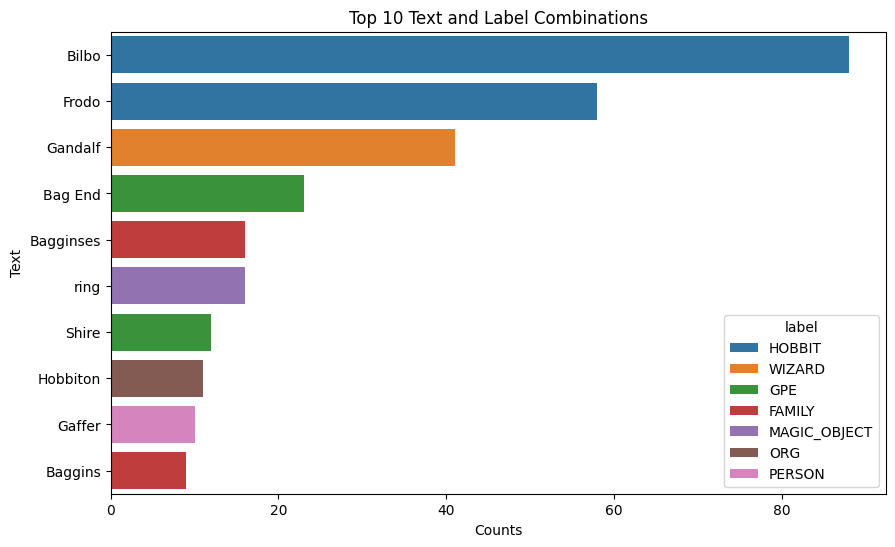

In [32]:
# Import seaborn and plt for better graphs
import seaborn as sns
import matplotlib.pyplot as plt

# Modify dataset for visualization
top_10_ents = ent_df[['text', 'label']].value_counts().head(10).reset_index(name='counts')

# Plotting counts for each combination of text and label
plt.figure(figsize=(10, 6))
sns.barplot(x='counts', y='text', data=top_10_ents, hue = "label")

# Add labels and title
plt.title('Top 10 Text and Label Combinations')
plt.xlabel('Counts')
plt.ylabel('Text')

# Display the plot
plt.show()